# Advent of Code 2019

In [271]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

### Parameters

In [16]:
dir_input = Path("input")

## Day 1: The Tyranny of the Rocket Equation

### Part 1

Santa has become stranded at the edge of the Solar System while delivering presents to other planets! To accurately calculate his position in space, safely align his warp drive, and return to Earth in time to save Christmas, he needs you to bring him measurements from fifty stars.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the Advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

The Elves quickly load you into a spacecraft and prepare to launch.

At the first Go / No Go poll, every Elf is Go until the Fuel Counter-Upper. They haven't determined the amount of fuel required yet.

Fuel required to launch a given module is based on its mass. Specifically, to find the fuel required for a module, take its mass, divide by three, round down, and subtract 2.

For example:

    For a mass of 12, divide by 3 and round down to get 4, then subtract 2 to get 2.
    For a mass of 14, dividing by 3 and rounding down still yields 4, so the fuel required is also 2.
    For a mass of 1969, the fuel required is 654.
    For a mass of 100756, the fuel required is 33583.

The Fuel Counter-Upper needs to know the total fuel requirement. To find it, individually calculate the fuel needed for the mass of each module (your puzzle input), then add together all the fuel values.

What is the sum of the fuel requirements for all of the modules on your spacecraft?


In [17]:
# Input
fn = dir_input / "input1_part1.txt"
data = np.loadtxt(fn)
print(data.shape)

(100,)


In [26]:
# Compute result
result_part1 = int(sum(np.floor(data / 3) - 2))
print(result_part1)

3412531


### Part 2

During the second Go / No Go poll, the Elf in charge of the Rocket Equation Double-Checker stops the launch sequence. Apparently, you forgot to include additional fuel for the fuel you just added.

Fuel itself requires fuel just like a module - take its mass, divide by three, round down, and subtract 2. However, that fuel also requires fuel, and that fuel requires fuel, and so on. Any mass that would require negative fuel should instead be treated as if it requires zero fuel; the remaining mass, if any, is instead handled by wishing really hard, which has no mass and is outside the scope of this calculation.

So, for each module mass, calculate its fuel and add it to the total. Then, treat the fuel amount you just calculated as the input mass and repeat the process, continuing until a fuel requirement is zero or negative. For example:

    A module of mass 14 requires 2 fuel. This fuel requires no further fuel (2 divided by 3 and rounded down is 0, which would call for a negative fuel), so the total fuel required is still just 2.
    At first, a module of mass 1969 requires 654 fuel. Then, this fuel requires 216 more fuel (654 / 3 - 2). 216 then requires 70 more fuel, which requires 21 fuel, which requires 5 fuel, which requires no further fuel. So, the total fuel required for a module of mass 1969 is 654 + 216 + 70 + 21 + 5 = 966.
    The fuel required by a module of mass 100756 and its fuel is: 33583 + 11192 + 3728 + 1240 + 411 + 135 + 43 + 12 + 2 = 50346.

What is the sum of the fuel requirements for all of the modules on your spacecraft when also taking into account the mass of the added fuel? (Calculate the fuel requirements for each module separately, then add them all up at the end.)

In [64]:
data2 = [14, ] #result_part1
result_fuel = 0

for i in data:
    while i > 6:
        i = np.floor(i / 3) - 2
        result_fuel += i

result_part2 = int(result_fuel)
print(result_part2)

5115927


## Day 2: 1202 Program Alarm

### Part 1

On the way to your gravity assist around the Moon, your ship computer beeps angrily about a "1202 program alarm". On the radio, an Elf is already explaining how to handle the situation: "Don't worry, that's perfectly norma--" The ship computer bursts into flames.

You notify the Elves that the computer's magic smoke seems to have escaped. "That computer ran Intcode programs like the gravity assist program it was working on; surely there are enough spare parts up there to build a new Intcode computer!"

An Intcode program is a list of integers separated by commas (like 1,0,0,3,99). To run one, start by looking at the first integer (called position 0). Here, you will find an opcode - either 1, 2, or 99. The opcode indicates what to do; for example, 99 means that the program is finished and should immediately halt. Encountering an unknown opcode means something went wrong.

Opcode 1 adds together numbers read from two positions and stores the result in a third position. The three integers immediately after the opcode tell you these three positions - the first two indicate the positions from which you should read the input values, and the third indicates the position at which the output should be stored.

For example, if your Intcode computer encounters 1,10,20,30, it should read the values at positions 10 and 20, add those values, and then overwrite the value at position 30 with their sum.

Opcode 2 works exactly like opcode 1, except it multiplies the two inputs instead of adding them. Again, the three integers after the opcode indicate where the inputs and outputs are, not their values.

Once you're done processing an opcode, move to the next one by stepping forward 4 positions.

For example, suppose you have the following program:

1,9,10,3,2,3,11,0,99,30,40,50

For the purposes of illustration, here is the same program split into multiple lines:
```
1,9,10,3,
2,3,11,0,
99,
30,40,50
```
The first four integers, 1,9,10,3, are at positions 0, 1, 2, and 3. Together, they represent the first opcode (1, addition), the positions of the two inputs (9 and 10), and the position of the output (3). To handle this opcode, you first need to get the values at the input positions: position 9 contains 30, and position 10 contains 40. Add these numbers together to get 70. Then, store this value at the output position; here, the output position (3) is at position 3, so it overwrites itself. Afterward, the program looks like this:
```
1,9,10,70,
2,3,11,0,
99,
30,40,50
```
Step forward 4 positions to reach the next opcode, 2. This opcode works just like the previous, but it multiplies instead of adding. The inputs are at positions 3 and 11; these positions contain 70 and 50 respectively. Multiplying these produces 3500; this is stored at position 0:
```
3500,9,10,70,
2,3,11,0,
99,
30,40,50
```
Stepping forward 4 more positions arrives at opcode 99, halting the program.

Here are the initial and final states of a few more small programs:
```
1,0,0,0,99 becomes 2,0,0,0,99 (1 + 1 = 2).
2,3,0,3,99 becomes 2,3,0,6,99 (3 * 2 = 6).
2,4,4,5,99,0 becomes 2,4,4,5,99,9801 (99 * 99 = 9801).
1,1,1,4,99,5,6,0,99 becomes 30,1,1,4,2,5,6,0,99.
```
Once you have a working computer, the first step is to restore the gravity assist program (your puzzle input) to the "1202 program alarm" state it had just before the last computer caught fire. To do this, before running the program, replace position 1 with the value 12 and replace position 2 with the value 2. What value is left at position 0 after the program halts?

In [134]:
# Input
def load_input(fn: Path):
    path = dir_input / fn
    return np.loadtxt(path, dtype=np.int, delimiter=',')

In [141]:
def apply_op(op, in1, in2, out):
    if op == 99:
        return True
    elif op == 1:
        data[out] = data[in1] + data[in2]
    elif op == 2:
        data[out] = data[in1] * data[in2]
    else:
        print("The op is not a valid number")
    return False

def prog(data):
    pos = 0
    halt = False
    while not halt:
    #     print(data[pos], data[pos+1], data[pos+2], data[pos+3])
        halt = apply_op(data[pos], data[pos+1], data[pos+2], data[pos+3])
        pos += 4
    return data[0]

In [143]:
data = load_input("input2_part1.txt")

noun, verb = 12, 2
data[1] = noun
data[2] = verb

result_part1 = prog(data)
print(result_part1)

4690667


### Part 2

"Good, the new computer seems to be working correctly! Keep it nearby during this mission - you'll probably use it again. Real Intcode computers support many more features than your new one, but we'll let you know what they are as you need them."

"However, your current priority should be to complete your gravity assist around the Moon. For this mission to succeed, we should settle on some terminology for the parts you've already built."

Intcode programs are given as a list of integers; these values are used as the initial state for the computer's memory. When you run an Intcode program, make sure to start by initializing memory to the program's values. A position in memory is called an address (for example, the first value in memory is at "address 0").

Opcodes (like 1, 2, or 99) mark the beginning of an instruction. The values used immediately after an opcode, if any, are called the instruction's parameters. For example, in the instruction 1,2,3,4, 1 is the opcode; 2, 3, and 4 are the parameters. The instruction 99 contains only an opcode and has no parameters.

The address of the current instruction is called the instruction pointer; it starts at 0. After an instruction finishes, the instruction pointer increases by the number of values in the instruction; until you add more instructions to the computer, this is always 4 (1 opcode + 3 parameters) for the add and multiply instructions. (The halt instruction would increase the instruction pointer by 1, but it halts the program instead.)

"With terminology out of the way, we're ready to proceed. To complete the gravity assist, you need to determine what pair of inputs produces the output 19690720."

The inputs should still be provided to the program by replacing the values at addresses 1 and 2, just like before. In this program, the value placed in address 1 is called the noun, and the value placed in address 2 is called the verb. Each of the two input values will be between 0 and 99, inclusive.

Once the program has halted, its output is available at address 0, also just like before. Each time you try a pair of inputs, make sure you first reset the computer's memory to the values in the program (your puzzle input) - in other words, don't reuse memory from a previous attempt.

Find the input noun and verb that cause the program to produce the output 19690720. What is 100 * noun + verb? (For example, if noun=12 and verb=2, the answer would be 1202.)

In [147]:
for noun in range(100):
    for verb in range(100):
        data = load_input("input2_part1.txt")

        data[1] = noun
        data[2] = verb

        if prog(data) == 19690720:
            print(noun, verb)
            result_part2 = 100 * noun + verb
            print(result_part2)
            break

62 55
6255


## Day3: Crossed Wires

### Part 1

The gravity assist was successful, and you're well on your way to the Venus refuelling station. During the rush back on Earth, the fuel management system wasn't completely installed, so that's next on the priority list.

Opening the front panel reveals a jumble of wires. Specifically, two wires are connected to a central port and extend outward on a grid. You trace the path each wire takes as it leaves the central port, one wire per line of text (your puzzle input).

The wires twist and turn, but the two wires occasionally cross paths. To fix the circuit, you need to find the intersection point closest to the central port. Because the wires are on a grid, use the Manhattan distance for this measurement. While the wires do technically cross right at the central port where they both start, this point does not count, nor does a wire count as crossing with itself.

For example, if the first wire's path is R8,U5,L5,D3, then starting from the central port (o), it goes right 8, up 5, left 5, and finally down 3:

    ...........
    ...........
    ...........
    ....+----+.
    ....|....|.
    ....|....|.
    ....|....|.
    .........|.
    .o-------+.
    ...........

Then, if the second wire's path is U7,R6,D4,L4, it goes up 7, right 6, down 4, and left 4:

    ...........
    .+-----+...
    .|.....|...
    .|..+--X-+.
    .|..|..|.|.
    .|.-X--+.|.
    .|..|....|.
    .|.......|.
    .o-------+.
    ...........
    
These wires cross at two locations (marked X), but the lower-left one is closer to the central port: its distance is 3 + 3 = 6.

Here are a few more examples:

    R75,D30,R83,U83,L12,D49,R71,U7,L72
    U62,R66,U55,R34,D71,R55,D58,R83 = distance 159
    R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51
    U98,R91,D20,R16,D67,R40,U7,R15,U6,R7 = distance 135

What is the Manhattan distance from the central port to the closest intersection?

In [192]:
# Input
def load_input(fn: Path):
    path = dir_input / fn
    data = []
    with open(path, 'r') as f:
        for line in f:
            data.append(line.rstrip().split(sep=','))
    return data

In [198]:
wires = load_input("input3_part1.txt")

In [212]:
direction_dict = {
    'U': [1, 0],
    'D': [-1, 0],
    'L': [0, -1],
    'R': [0, 1],
}

In [301]:
# Find the crossing points
grid = dict()
grid_crossing = dict()
x0, y0 = 0, 0
for i, wire in enumerate(wires):
    x, y = x0, y0
    for path in wire:
        dx, dy = direction_dict[path[0]]
        magnitude = int(path[1:])
        for j in range(1, magnitude+1):
            x, y = x + dx, y + dy
            key = f"{x:+05d}_{y:+05d}"
            if key in grid.keys() and i == 1:
                grid_crossing[key] = [x, y]
            else:
                if i == 0:
                    # First wire only
                    grid[key] = 1

# Crossing points
crossing = np.array(list(grid_crossing.values()), dtype=np.int)

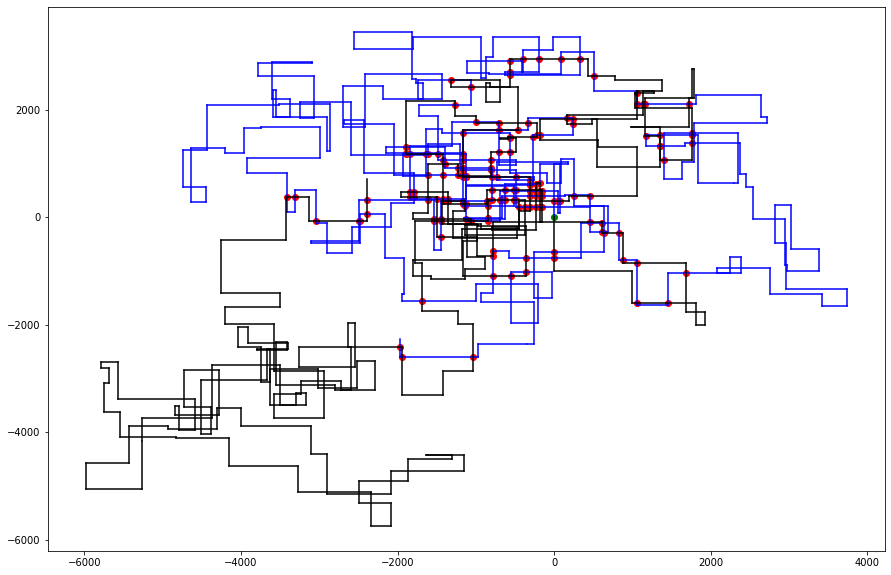

In [304]:
# Plot the wires
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
x0, y0 = 0, 0
colors = ['b', 'k']
for i, wire in enumerate(wires):
    x, y = x0, y0
    for path in wire:
        dx, dy = direction_dict[path[0]]
        magnitude = int(path[1:])
        line = [x, x + dx * magnitude], [y, y + dy * magnitude]
        x, y = x + dx * magnitude, y + dy * magnitude
        _ = ax.plot(*line, marker=None, color=colors[i])
#         display(fig)
#         clear_output(wait = True)

# Plot crossing points and origin
_ = ax.scatter(crossing[:, 0], crossing[:, 1], color='r')
_ = ax.scatter(x0, y0, color='g')

In [310]:
# Result
result_part1 = min([sum([abs(i) for i in point]) for point in grid_crossing.values()])
print(result_part1)

303


### Part 2

It turns out that this circuit is very timing-sensitive; you actually need to minimize the signal delay.

To do this, calculate the number of steps each wire takes to reach each intersection; choose the intersection where the sum of both wires' steps is lowest. If a wire visits a position on the grid multiple times, use the steps value from the first time it visits that position when calculating the total value of a specific intersection.

The number of steps a wire takes is the total number of grid squares the wire has entered to get to that location, including the intersection being considered. Again consider the example from above:

    ...........
    .+-----+...
    .|.....|...
    .|..+--X-+.
    .|..|..|.|.
    .|.-X--+.|.
    .|..|....|.
    .|.......|.
    .o-------+.
    ...........

In the above example, the intersection closest to the central port is reached after 8+5+5+2 = 20 steps by the first wire and 7+6+4+3 = 20 steps by the second wire for a total of 20+20 = 40 steps.

However, the top-right intersection is better: the first wire takes only 8+5+2 = 15 and the second wire takes only 7+6+2 = 15, a total of 15+15 = 30 steps.

Here are the best steps for the extra examples from above:

    R75,D30,R83,U83,L12,D49,R71,U7,L72
    U62,R66,U55,R34,D71,R55,D58,R83 = 610 steps
    R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51
    U98,R91,D20,R16,D67,R40,U7,R15,U6,R7 = 410 steps

What is the fewest combined steps the wires must take to reach an intersection?

In [321]:
wires = load_input("input3_part1.txt")

# Find the crossing points
grid = dict()
grid_crossing = dict()
x0, y0 = 0, 0
for i, wire in enumerate(wires):
    x, y = x0, y0
    steps = 0
    for path in wire:
        dx, dy = direction_dict[path[0]]
        magnitude = int(path[1:])
        for j in range(1, magnitude+1):
            x, y = x + dx, y + dy
            steps += 1
            key = f"{x:+05d}_{y:+05d}"
            if key in grid.keys() and i == 1:
                grid_crossing[key] = [x, y, grid[key] + steps]
            else:
                if i == 0:
                    # First wire only
                    grid[key] = steps

# Crossing points
crossing = np.array(list(grid_crossing.values()), dtype=np.int)

In [322]:
# Result
result_part2 = min(crossing[:, 2])
print(result_part2)

11222


## Day 4: Secure Container

### Part 1

You arrive at the Venus fuel depot only to discover it's protected by a password. The Elves had written the password on a sticky note, but someone threw it out.

However, they do remember a few key facts about the password:

    It is a six-digit number.
    The value is within the range given in your puzzle input.
    Two adjacent digits are the same (like 22 in 122345).
    Going from left to right, the digits never decrease; they only ever increase or stay the same (like 111123 or 135679).

Other than the range rule, the following are true:

    111111 meets these criteria (double 11, never decreases).
    223450 does not meet these criteria (decreasing pair of digits 50).
    123789 does not meet these criteria (no double).

How many different passwords within the range given in your puzzle input meet these criteria?

In [354]:
limits = [246515, 739105]
limits[1] += 1 # Add 1 so that the upper limit is included when using range

In [339]:
a = np.array(1234)
a.size
s = np.array_str(a)
type(s)


str

In [346]:
def check_double(number):
    s = np.array_str(np.array(number))
    l = len(s)
    for i in range(l - 1):
        if s[i] == s[i + 1]:
            return True
    return False

In [345]:
check_double(1234522)

True

In [347]:
def check_increase(number):
    s = np.array_str(np.array(number))
    l = len(s)
    for i in range(l - 1):
        if int(s[i]) > int(s[i + 1]):
            return False
    return True

In [361]:
check_increase(1234522)

False

In [357]:
def count_valid(limits):
    cnt = 0
    for i in range(*limits):
        if check_double(i) and check_increase(i):
            cnt += 1
    return cnt

In [362]:
result_part1 = count_valid(limits)
print(result_part1)

1048


### Part 2

An Elf just remembered one more important detail: the two adjacent matching digits are not part of a larger group of matching digits.

Given this additional criterion, but still ignoring the range rule, the following are now true:

    112233 meets these criteria because the digits never decrease and all repeated digits are exactly two digits long.
    123444 no longer meets the criteria (the repeated 44 is part of a larger group of 444).
    111122 meets the criteria (even though 1 is repeated more than twice, it still contains a double 22).

How many different passwords within the range given in your puzzle input meet all of the criteria?

In [425]:
def check_double_part2(number):
    s = np.array_str(np.array(number))
    l = len(s)
    cnt_list = []
    i = 0
    while i < l:
        cnt = 1
        for j in range(i + 1, l):
#             print(f"i, j is {i},{j}")
            if s[i] == s[j]:
                cnt += 1
        cnt_list.append(cnt)
        i += cnt
    if 2 in cnt_list:
        return True
    else:
        return False

In [426]:
check_double_part2(222233)

True

In [427]:
def count_valid_part2(limits):
    cnt = 0
    for i in range(*limits):
        if check_double_part2(i) and check_increase(i):
            cnt += 1
    return cnt

In [428]:
result_part2 = count_valid_part2(limits)
print(result_part2)

677


## Day 5: Sunny with a Chance of Asteroids

### Part 1

You're starting to sweat as the ship makes its way toward Mercury. The Elves suggest that you get the air conditioner working by upgrading your ship computer to support the Thermal Environment Supervision Terminal.

The Thermal Environment Supervision Terminal (TEST) starts by running a diagnostic program (your puzzle input). The TEST diagnostic program will run on your existing Intcode computer after a few modifications:

First, you'll need to add two new instructions:

    Opcode 3 takes a single integer as input and saves it to the position given by its only parameter. For example, the instruction 3,50 would take an input value and store it at address 50.
    Opcode 4 outputs the value of its only parameter. For example, the instruction 4,50 would output the value at address 50.

Programs that use these instructions will come with documentation that explains what should be connected to the input and output. The program 3,0,4,0,99 outputs whatever it gets as input, then halts.

Second, you'll need to add support for parameter modes:

Each parameter of an instruction is handled based on its parameter mode. Right now, your ship computer already understands parameter mode 0, position mode, which causes the parameter to be interpreted as a position - if the parameter is 50, its value is the value stored at address 50 in memory. Until now, all parameters have been in position mode.

Now, your ship computer will also need to handle parameters in mode 1, immediate mode. In immediate mode, a parameter is interpreted as a value - if the parameter is 50, its value is simply 50.

Parameter modes are stored in the same value as the instruction's opcode. The opcode is a two-digit number based only on the ones and tens digit of the value, that is, the opcode is the rightmost two digits of the first value in an instruction. Parameter modes are single digits, one per parameter, read right-to-left from the opcode: the first parameter's mode is in the hundreds digit, the second parameter's mode is in the thousands digit, the third parameter's mode is in the ten-thousands digit, and so on. Any missing modes are 0.

For example, consider the program 1002,4,3,4,33.

The first instruction, 1002,4,3,4, is a multiply instruction - the rightmost two digits of the first value, 02, indicate opcode 2, multiplication. Then, going right to left, the parameter modes are 0 (hundreds digit), 1 (thousands digit), and 0 (ten-thousands digit, not present and therefore zero):

    ABCDE
     1002

    DE - two-digit opcode,      02 == opcode 2
     C - mode of 1st parameter,  0 == position mode
     B - mode of 2nd parameter,  1 == immediate mode
     A - mode of 3rd parameter,  0 == position mode,
                                      omitted due to being a leading zero

This instruction multiplies its first two parameters. The first parameter, 4 in position mode, works like it did before - its value is the value stored at address 4 (33). The second parameter, 3 in immediate mode, simply has value 3. The result of this operation, 33 * 3 = 99, is written according to the third parameter, 4 in position mode, which also works like it did before - 99 is written to address 4.

Parameters that an instruction writes to will never be in immediate mode.

Finally, some notes:

    It is important to remember that the instruction pointer should increase by the number of values in the instruction after the instruction finishes. Because of the new instructions, this amount is no longer always 4.
    Integers can be negative: 1101,100,-1,4,0 is a valid program (find 100 + -1, store the result in position 4).

The TEST diagnostic program will start by requesting from the user the ID of the system to test by running an input instruction - provide it 1, the ID for the ship's air conditioner unit.

It will then perform a series of diagnostic tests confirming that various parts of the Intcode computer, like parameter modes, function correctly. For each test, it will run an output instruction indicating how far the result of the test was from the expected value, where 0 means the test was successful. Non-zero outputs mean that a function is not working correctly; check the instructions that were run before the output instruction to see which one failed.

Finally, the program will output a diagnostic code and immediately halt. This final output isn't an error; an output followed immediately by a halt means the program finished. If all outputs were zero except the diagnostic code, the diagnostic program ran successfully.

After providing 1 to the only input instruction and passing all the tests, what diagnostic code does the program produce?

In [429]:
# Input
def load_input(fn: Path):
    path = dir_input / fn
    return np.loadtxt(path, dtype=np.int, delimiter=',')

In [546]:
op_dict = {
    1: [3, ['i', 'i', 'o']],
    2: [3, ['i', 'i', 'o']],
    3: [1, ['o',]],
    4: [1, ['o',]],
    99: [0, []],
}

In [547]:
op_dict

{1: [3, ['i', 'i', 'o']],
 2: [3, ['i', 'i', 'o']],
 3: [1, ['o']],
 4: [1, ['o']],
 99: [0, []]}

In [582]:
def apply_op(op, params, input_instruction=None):
    if op == 99:
        print("The system will halt")
        return True, -1
    elif op == 1:
        in1 = params[0][0]
        in2 = params[1][0]
        out = params[2][0]
        data[out] = in1 + in2
        return False, -1
    elif op == 2:
        in1 = params[0][0]
        in2 = params[1][0]
        out = params[2][0]
        data[out] = in1 * in2
        return False, -1
    elif op == 3:
        out = params[0][0]
        data[out] = input_instruction
        return False, -1
    elif op == 4:
        out = params[0][0]
        return False, data[out]
    else:
        print("The op is not a valid number")

def prog(data, input_instruction=None):
    pos = 0
    halt = False
    while not halt:
        print(f"The position is {pos} and the instruction is {data[pos]}")
        op_1, op_10, *modes = data[pos] // 10 ** np.array([0, 1, 2, 3, 4]) % 10
        op = op_1 + 10 * op_10
        print(f"The operation is {op}")
        params = [[data[pos + 1 + i], modes[i], op_dict[op][1][i]] for i in range(op_dict[op][0])]
#         print(f"The parameters are {params}")
        for param in params:
            if param[1] == 0 and param[2] == 'i':
                # Position mode
                param[0] = data[param[0]]
#         print(f"The parameters are {params}")
        halt, diagnostic = apply_op(op, params, input_instruction)
        pos += op_dict[op][0] + 1
        if diagnostic > 0:
            result = diagnostic
            print(f"The diagnostic message is {diagnostic}")
        print("---")
    return result

In [583]:
data = load_input("input5_part1.txt")

input_instruction = 1

result_part1 = prog(data, input_instruction)
print(result_part1)

The position is 0 and the instruction is 3
The operation is 3
---
The position is 2 and the instruction is 1
The operation is 1
---
The position is 6 and the instruction is 1101
The operation is 1
---
The position is 10 and the instruction is 104
The operation is 4
The diagnostic message is 3
---
The position is 12 and the instruction is 1102
The operation is 2
---
The position is 16 and the instruction is 1001
The operation is 1
---
The position is 20 and the instruction is 4
The operation is 4
---
The position is 22 and the instruction is 102
The operation is 2
---
The position is 26 and the instruction is 101
The operation is 1
---
The position is 30 and the instruction is 1
The operation is 1
---
The position is 34 and the instruction is 1101
The operation is 1
---
The position is 38 and the instruction is 1102
The operation is 2
---
The position is 42 and the instruction is 1102
The operation is 2
---
The position is 46 and the instruction is 1101
The operation is 1
---
The positi

### Part 2

The air conditioner comes online! Its cold air feels good for a while, but then the TEST alarms start to go off. Since the air conditioner can't vent its heat anywhere but back into the spacecraft, it's actually making the air inside the ship warmer.

Instead, you'll need to use the TEST to extend the thermal radiators. Fortunately, the diagnostic program (your puzzle input) is already equipped for this. Unfortunately, your Intcode computer is not.

Your computer is only missing a few opcodes:

    Opcode 5 is jump-if-true: if the first parameter is non-zero, it sets the instruction pointer to the value from the second parameter. Otherwise, it does nothing.
    Opcode 6 is jump-if-false: if the first parameter is zero, it sets the instruction pointer to the value from the second parameter. Otherwise, it does nothing.
    Opcode 7 is less than: if the first parameter is less than the second parameter, it stores 1 in the position given by the third parameter. Otherwise, it stores 0.
    Opcode 8 is equals: if the first parameter is equal to the second parameter, it stores 1 in the position given by the third parameter. Otherwise, it stores 0.

Like all instructions, these instructions need to support parameter modes as described above.

Normally, after an instruction is finished, the instruction pointer increases by the number of values in that instruction. However, if the instruction modifies the instruction pointer, that value is used and the instruction pointer is not automatically increased.

For example, here are several programs that take one input, compare it to the value 8, and then produce one output:

    3,9,8,9,10,9,4,9,99,-1,8 - Using position mode, consider whether the input is equal to 8; output 1 (if it is) or 0 (if it is not).
    3,9,7,9,10,9,4,9,99,-1,8 - Using position mode, consider whether the input is less than 8; output 1 (if it is) or 0 (if it is not).
    3,3,1108,-1,8,3,4,3,99 - Using immediate mode, consider whether the input is equal to 8; output 1 (if it is) or 0 (if it is not).
    3,3,1107,-1,8,3,4,3,99 - Using immediate mode, consider whether the input is less than 8; output 1 (if it is) or 0 (if it is not).

Here are some jump tests that take an input, then output 0 if the input was zero or 1 if the input was non-zero:

    3,12,6,12,15,1,13,14,13,4,13,99,-1,0,1,9 (using position mode)
    3,3,1105,-1,9,1101,0,0,12,4,12,99,1 (using immediate mode)

Here's a larger example:

    3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,
    1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,
    999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99

The above example program uses an input instruction to ask for a single number. The program will then output 999 if the input value is below 8, output 1000 if the input value is equal to 8, or output 1001 if the input value is greater than 8.

This time, when the TEST diagnostic program runs its input instruction to get the ID of the system to test, provide it 5, the ID for the ship's thermal radiator controller. This diagnostic test suite only outputs one number, the diagnostic code.

What is the diagnostic code for system ID 5?

In [589]:
op_dict = {
    1: [3, ['i', 'i', 'o']],
    2: [3, ['i', 'i', 'o']],
    3: [1, ['o',]],
    4: [1, ['o',]],
    5: [2, ['i', 'i',]],
    6: [2, ['i', 'i',]],
    7: [3, ['i', 'i', 'o']],
    8: [3, ['i', 'i', 'o']],
    99: [0, []],
}

In [612]:
def apply_op(op, params, input_instruction=None):
    if op == 99:
        print("The system will halt")
        return True, -1, -1
    elif op == 1:
        in1 = params[0][0]
        in2 = params[1][0]
        out = params[2][0]
        data[out] = in1 + in2
        return False, -1, -1
    elif op == 2:
        in1 = params[0][0]
        in2 = params[1][0]
        out = params[2][0]
        data[out] = in1 * in2
        return False, -1, -1
    elif op == 3:
        out = params[0][0]
        data[out] = input_instruction
        return False, -1, -1
    elif op == 4:
        out = params[0][0]
        return False, data[out], -1
    elif op == 5:
        in1 = params[0][0]
        in2 = params[1][0]
        if in1:
            instruction_pointer = in2
            return False, -1, instruction_pointer
        else:
            return False, -1, -1
    elif op == 6:
        in1 = params[0][0]
        in2 = params[1][0]
        if not in1:
            instruction_pointer = in2
            return False, -1, instruction_pointer
        else:
            return False, -1, -1
    elif op == 7:
        in1 = params[0][0]
        in2 = params[1][0]
        out = params[2][0]
        if in1 < in2:
            data[out] = 1
        else:
            data[out] = 0
        return False, -1, -1
    elif op == 8:
        in1 = params[0][0]
        in2 = params[1][0]
        out = params[2][0]
        if in1 == in2:
            data[out] = 1
        else:
            data[out] = 0
        return False, -1, -1
    else:
        print("The op is not a valid number")

def prog(data, input_instruction=None):
    result = 0
    pos = 0
    halt = False
    while not halt:
        print(f"The position is {pos} and the instruction is {data[pos]}")
        op_1, op_10, *modes = data[pos] // 10 ** np.array([0, 1, 2, 3, 4]) % 10
        op = op_1 + 10 * op_10
        print(f"The operation is {op}")
        params = [[data[pos + 1 + i], modes[i], op_dict[op][1][i]] for i in range(op_dict[op][0])]
        print(f"The parameters are {params}")
        for param in params:
            if param[1] == 0 and param[2] == 'i':
                # Position mode
                param[0] = data[param[0]]
        print(f"The parameters are {params}")
        halt, diagnostic, instruction_pointer = apply_op(op, params, input_instruction)
        if instruction_pointer == -1:
            pos += op_dict[op][0] + 1
        else:
            pos = instruction_pointer
        if diagnostic > 0:
            result = diagnostic
            print(f"The diagnostic message is {diagnostic}")
        print("---")
    return result

In [613]:
data = load_input("input5_part1.txt")

# data = [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,
# 1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,
# 999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99]

# data = [3,12,6,12,15,1,13,14,13,4,13,99,-1,0,1,9]

input_instruction = 5

result_part1 = prog(data, input_instruction)
print(result_part1)

The position is 0 and the instruction is 3
The operation is 3
The parameters are [[225, 0, 'o']]
The parameters are [[225, 0, 'o']]
---
The position is 2 and the instruction is 1
The operation is 1
The parameters are [[225, 0, 'i'], [6, 0, 'i'], [6, 0, 'o']]
The parameters are [[5, 0, 'i'], [1100, 0, 'i'], [6, 0, 'o']]
---
The position is 6 and the instruction is 1105
The operation is 5
The parameters are [[1, 1, 'i'], [238, 1, 'i']]
The parameters are [[1, 1, 'i'], [238, 1, 'i']]
---
The position is 238 and the instruction is 1105
The operation is 5
The parameters are [[0, 1, 'i'], [99999, 1, 'i']]
The parameters are [[0, 1, 'i'], [99999, 1, 'i']]
---
The position is 241 and the instruction is 1105
The operation is 5
The parameters are [[227, 1, 'i'], [247, 1, 'i']]
The parameters are [[227, 1, 'i'], [247, 1, 'i']]
---
The position is 247 and the instruction is 1005
The operation is 5
The parameters are [[227, 0, 'i'], [99999, 1, 'i']]
The parameters are [[0, 0, 'i'], [99999, 1, 'i']]